In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# WHAT IS COST FUNCTION : A cost function is an  important parameter that determines how well a machine learning
#                           model performs for a given dataset.
#   cost function is a measure of how wrong the model is in estimating the relationship between x(input) and y(output) parameter.

In [3]:
 # TYPES OF COST FUNCTION :
# 1) REGRESSION COST FUNCTION ---> 1) regression models are used to make a prediction for the continuous variables.
#                               ---> 2) MSE(mean square error)
#                               ---> 3) RMSE (root mean square error)
#                               ---> 4) MAE (mean absolute error)
#                               ---> 5) R^2 (Accuracy)
# 2) CLASSIFICATION COST FUNCTION ---> 1) BINARY CLASSIFICATION COST FUNCTIONS:
#                                           classification models are used to make predictions of categorical variables,such as predictions
#                                           for 0 or 1, cat or dog, etc.
#                                  ---> 2) MULTI CLASS CLASSIFICATION COST FUNCTIONS:
#                                          A multi-class classification cost function is used in the classification problems for which instances 
#                                          are allocated to one of more than two classes.

# BINARY CROSS ENTROPY COST FUNCTION OR LOG LOSS FUNCTION .

In [4]:
# REGRESSION COST FUNCTION 
# MEAN SQUARED ERROR :
# mean squared error(MSE) is the mean squared difference between the actual and predited values.MSE penalizes high
#                             errors caused by outliers by squaring the errors.
    
#                            1) mean squared error is also known as L2 loss

# FORMULA : MEAN SQUARED ERROR : 1/n sum(yi-yi^)^2

In [5]:
# MEAN ABSOLUTE ERROR : 1) mean absolute error(MAE) is the mean absolute difference between the actual values and predicted values.
#                         2) MAE is more robust to outliers.the insensitivity to outliers is because it does not penalizes high errors caused by outlers by errors.
    
# FORMULA : MEAN ABSOLUTE ERROR : 1/n sum|yi-yi^|

In [6]:
# ROOT MEAN SQUARED ERROR :
# 1) root mean squared error(RMSE) is the  root mean squared  difference between the actual values and predicted values.
#                         2) RMSE can be used in situations.where we want to penalizes high errors not as much as MSE does.

# FORMULA : ROOT MEAN SQUARED ERROR = root (1/n) sum(yi-yi^)^2
    

In [7]:
# HOW TO FIND BEST FIT LINE :

# REGULARIZATION :
# L1(LASSO REGULARIZATION): 1) this is a regularization technique used in feature selection using a shrinkage method also referred to as the penalized regression method.
#                            2) lasso regression magnitude of coefficients can be exactly zero.
#              FORMULA : COST FUNCTION = LOSS +LAMBDA SUM||W||.
# .) LOSS = sum of squared residual
# .) lambda = penalty
# .) w = slope of the curve


# L2(RIDGE REGULARIZATION) : 1) ridge regression ,also known as L2 regularization, is an extension to linear regression that introduces a regularization term to reduce model complexity and help 
#                                and help prevent overfitting.
#                              2) ridge regression is working value/magnitude of coefficients is almost equal to zero.
        
        # FORMULA : COST FUNCTION : LOSS +LAMBDA SUM||W||^2.
        
# .) LOSS = sum of squared residual
# .) lambda = penalty
# .) w = slope of the curve
                             

In [8]:
# REGULARIZATION : 1) this is a form of regression ,that constrains/regularizes or shrinks the coefficient estimates towards zero.
#                 2) this technique discourages learning a more complex or fliexible model,so as to avoid the risk of overfiting.
    

In [9]:
df = pd.read_csv("Housing.csv")

In [10]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [11]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [12]:
df.dtypes


price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [13]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [14]:
numeric_df = df.select_dtypes(include='number')


In [15]:
numeric_df

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [16]:
# Example conversion: convert categorical 'quality' column to numeric
df['bedrooms'] = df['bedrooms'].map({'low': 1, 'medium': 2, 'high': 3})


In [17]:
corr_matrix = numeric_df.corr()

In [18]:
corr_matrix

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


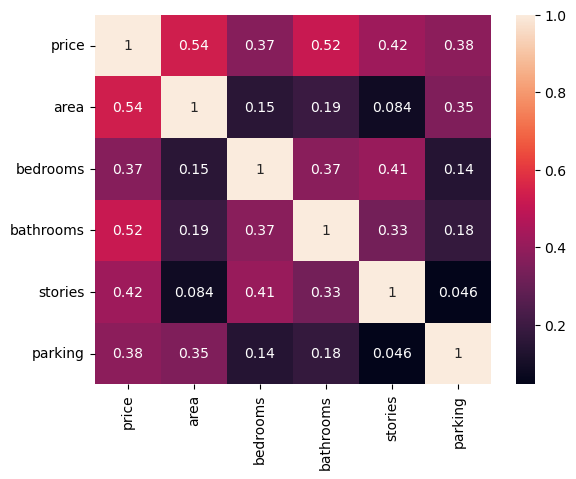

In [19]:
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

In [20]:
x = df.iloc[:,:-1]
x

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,NaN,2,3,yes,no,no,no,yes,2,yes
1,12250000,8960,NaN,4,4,yes,no,no,no,yes,3,no
2,12250000,9960,NaN,2,2,yes,no,yes,no,no,2,yes
3,12215000,7500,NaN,2,2,yes,no,yes,no,yes,3,yes
4,11410000,7420,NaN,1,2,yes,yes,yes,no,yes,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,NaN,1,1,yes,no,yes,no,no,2,no
541,1767150,2400,NaN,1,1,no,no,no,no,no,0,no
542,1750000,3620,NaN,1,1,yes,no,no,no,no,0,no
543,1750000,2910,NaN,1,1,no,no,no,no,no,0,no


In [21]:
x = df.iloc[:,:-1]
y = df["price"]

In [22]:
x.dtypes

price                int64
area                 int64
bedrooms           float64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
dtype: object

In [23]:
numeric_x = x.select_dtypes(include='number')


In [24]:
numeric_x

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,NaN,2,3,2
1,12250000,8960,NaN,4,4,3
2,12250000,9960,NaN,2,2,2
3,12215000,7500,NaN,2,2,3
4,11410000,7420,NaN,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,NaN,1,1,2
541,1767150,2400,NaN,1,1,0
542,1750000,3620,NaN,1,1,0
543,1750000,2910,NaN,1,1,0


In [25]:
# Example conversion: convert categorical 'quality' column to numeric
x['bedrooms'] = x['bedrooms'].map({'bad': 1, 'average': 2, 'good': 3})


In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(numeric_x)
x_scaled = sc.transform(numeric_x)


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [27]:
sc = StandardScaler()
sc.fit(numeric_x)
x_scaled = sc.transform(numeric_x)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [28]:
x_scaled

array([[ 4.56636513,  1.04672629,         nan,  1.42181174,  1.37821692,
         1.51769249],
       [ 4.00448405,  1.75700953,         nan,  5.40580863,  2.53202371,
         2.67940935],
       [ 4.00448405,  2.21823241,         nan,  1.42181174,  0.22441013,
         1.51769249],
       ...,
       [-1.61432675, -0.70592066,         nan, -0.57018671, -0.92939666,
        -0.80574124],
       [-1.61432675, -1.03338891,         nan, -0.57018671, -0.92939666,
        -0.80574124],
       [-1.61432675, -0.5998394 ,         nan, -0.57018671,  0.22441013,
        -0.80574124]])

In [32]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge

In [37]:
(x_train.dtypes)


price                int64
area                 int64
bedrooms           float64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
dtype: object

In [41]:
numeric_x_train = x_train.select_dtypes(include='number')


In [42]:
# Example conversion: convert categorical 'condition' column to numeric
x_train['price'] = x_train['price'].map({'yes': 1, 'no': 0})


In [50]:
x_train

,A,B,condition
4,5,1,1
2,3,3,1
0,1,5,1
3,4,2,0


In [51]:
y_train

4    300
2    150
0    100
3    250
Name: price, dtype: int64

In [53]:
from sklearn.metrics import r2_score

In [55]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()